In [4]:
import pandas as pd
import numpy as np 
import seaborn as sns; sns.set()
from wordle_wise.api import *
import matplotlib.pyplot as plt
from collections import Counter

In [5]:
file_path = 'data/unigram_freq.csv'
WORD_COLUMN = 'word'
FREQ_COLUMN = 'count'
ignore_characters = ['_', '', ' ']
alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','y','x','z']
alphabet = [x.upper() for x in alphabet]

word_bank = get_wordle_word_bank(pd.read_csv(file_path), nletters=5)


word_bank.head()

/Users/jasongoldrosen/Documents/datasci_projects/wordle-wise/wordle_wise/api.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[WORD_COLUMN] = df[WORD_COLUMN].str.upper()


,word,count
35,ABOUT,1226734006
45,OTHER,978481319
56,WHICH,810514085
57,THEIR,782849411
62,THERE,701170205


In [29]:
cnts = [word_bank.word.str.contains(letter).sum() for letter in alphabet]

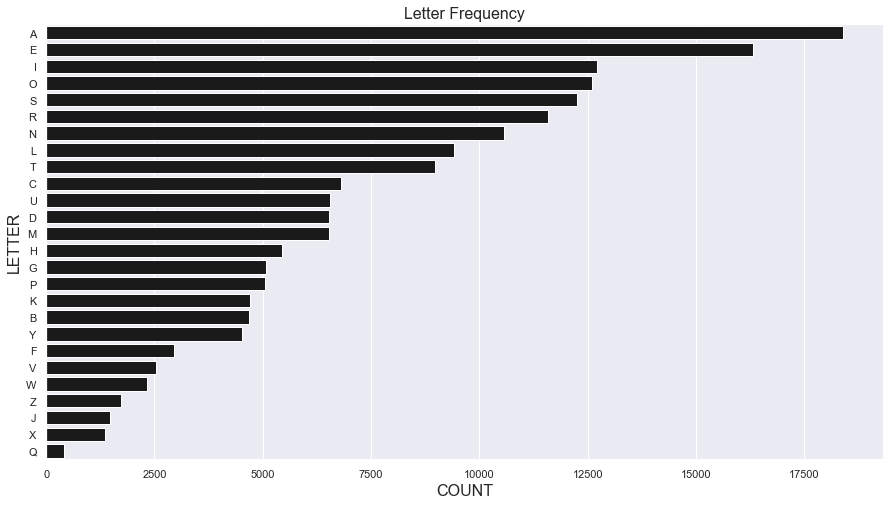

In [60]:
summary_df = pd.DataFrame({'letter':alphabet,
                           'count': cnts})
summary_df.sort_values('count',ascending=False, inplace=True)

sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.barplot(x="count", y="letter", data=summary_df, color='k')
ax.set_title('Letter Frequency', size=16)
ax.set_ylabel('LETTER', size=16)
ax.set_xlabel('COUNT', size=16)

plt.show()

In [72]:
# word_bank['word_value'] = 0
# word_bank['unique_chars'] = word_bank['word'].apply(lambda x: "".join(set(x)))
# word_bank['word_value'] = word_bank['unique_chars'].apply(lambda x: sum([letter_counts[xx] for xx in x]))

# word_bank.sort_values('word_value', ascending=False).head(50)

# word_bank

,word,count,word_value,unique_chars
93757,AERIO,111086,71603,EROIA
205739,SEIRA,29347,71251,SERIA
3550,RAISE,21099943,71251,SERIA
62587,SERIA,225801,71251,SERIA
302402,ASIER,14955,71251,SERIA
189868,AESIR,33093,71251,SERIA
257002,SIERA,20165,71251,SERIA
7086,ARISE,8337093,71251,SERIA
163211,SAREI,43005,71251,SERIA
180818,SERAI,35974,71251,SERIA


In [ ]:
alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','y','x','z']
alphabet = [x.upper() for x in alphabet]

def rescale(x):
    return (x - min(x)) / max(x)

def calc_word_value(words:np.array, weight:np.array=np.ones(len(words))):
    unique_chars = ["".join(set(x)) for x in words]
    cnts = {a: sum([a in w for w in words]) - 1 for a in alphabet}
    word_value = np.array([sum([cnts[w] for w in chars]) for chars in unique_chars], dtype=int)
    return rescale(word_value)

def calc_letter_position_value(words:np.array, weight:np.array=np.ones(len(words))):
    char_pos_value = np.zeros(len(words), dtype=int)
    for i in range(5):
        ith_pos = [w[i] for w in words]
        cnt_dict = {letter:len([i for i in ith_pos if i ==letter]) for letter in alphabet}
        char_pos_value += [cnt_dict[i] - 1 for i in ith_pos]
    return rescale(char_pos_value)

def expected_greens(word:str, word_bank:np.array, weight:np.array=np.ones(len(word_bank))):
    expected_green = 0
    for i,letter in enumerate(word):
        is_green = np.array([w[i] == letter for w in word_bank])
        expected_green += (is_green * weight).sum() / weight.sum()
    return expected_green

def expected_yellows(word:str, word_bank:np.array, weight:np.array=np.ones(len(word_bank))):
    pass


word_bank = get_wordle_word_bank(pd.read_csv(file_path), nletters=5)



word_bank['count'] = rescale(word_bank['count'].copy())
word_bank['word_value'] = calc_word_value(words=word_bank['word'])
word_bank['char_pos_value'] = calc_letter_position_value(words=word_bank['word'])
# SLOWWWW BUT MAYBE THIS WORKS
word_bank['expected_greens'] = word_bank['word'].apply(lambda x: expected_greens(word=x, word_bank=word_bank['word'].values, weight=word_bank['count'].values))

# expected_greens(word='RANTS', word_bank=word_bank.word.values, weight=word_bank['count'].values)

word_bank['final_value'] =  word_bank['count'] * .2 + word_bank['word_value'] * .4 + word_bank['char_pos_value'] * .44

word_bank.sort_values('final_value', ascending=False, inplace=True)
word_bank.head()



/Users/jasongoldrosen/Documents/datasci_projects/wordle-wise/wordle_wise/api.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[WORD_COLUMN] = df[WORD_COLUMN].str.upper()


In [33]:
guessed_word = 'TASTE'
actual_word = 'DARTS'

is_green = [g==a for g,a in zip(list(guessed_word),list(actual_word))]
is_green_positions = [i for i,v in enumerate(is_green) if v==True]
non_green_positions = [i for i in range(len(guessed_word)) if i not in is_green_positions]

is_green_positions

not_green_guessed_word = [letter for i, letter in enumerate(list(guessed_word)) if i in non_green_positions]
not_green_actual_word = [letter for i, letter in enumerate(list(actual_word)) if i in non_green_positions]

is_yellow = [g in list(not_green_actual_word) for g in list(not_green_guessed_word)]
is_yellow_positions = [non_green_positions[i] for i,v in enumerate(is_yellow) if v==True]
not_green_guessed_word, not_green_actual_word, is_yellow, is_yellow_positions                                                            
                                                            
output = list('_' * len(guessed_word))

for i in is_green_positions:
    output[i] = 'G'

for i in is_yellow_positions:
    output[i] = 'Y'

output = "".join(output)
output

'_GYG_'

In [31]:
def score_word(guessed_word,actual_word):

    if len(guessed_word) != len(actual_word):
        raise ValueError('Word lengths do not match')
    gw = list(guessed_word)
    aw = list(actual_word)

    remaining_positions_guess = [i for i in range(len(gw))]
    remaining_positions_actual = [i for i in range(len(gw))]
    is_green_positions = []
    is_yellow_positions = []

    # Greens
    for i,letter in enumerate(gw):
        if gw[i] == aw[i]:
            is_green_positions += [i]
            remaining_positions_guess.remove(i)
            remaining_positions_actual.remove(i)

    # Yellows
    aw_remaining = [w for i, w in enumerate(aw) if i in remaining_positions_actual]
    for i,letter in enumerate(gw):
            if i not in remaining_positions_guess:
                continue 
            if gw[i] in aw_remaining:
                is_yellow_positions += [i]
                remaining_positions_guess.remove(i)
                aw_remaining.remove(gw[i])

    result = list('_' * len(guessed_word))

    for i in is_green_positions:
        result[i] = 'G'

    for i in is_yellow_positions:
        result[i] = 'Y'

    result = "".join(result)
    return result      


def count_letter(result, letters):
    cnt = tuple([Counter(result)[l] for l in letters])
    return cnt
    
result = score_word(guessed_word = 'TATOO',actual_word = 'ABOUT')
score = count_letter(result, letters=['G','Y'])

result, score


('YY_Y_', (0, 3))

In [7]:
print(score_word(guessed_word = 'TATOO',actual_word = 'ABOUT'))
print(score_word(guessed_word = 'ABOUT',actual_word = 'TATOO'))
print(score_word(guessed_word = 'TASTE',actual_word = 'ABOUT'))


YY_Y_
Y_Y_Y
YY___


In [24]:
possible_words = word_bank.word.values[0:100]
weights = word_bank['count'].values[0:100]
weights = weights / weights.sum()

guessed_word = 'TATOO'
results = [score_word(guessed_word, pw) for pw in possible_words]
scored_results = [(count_letter(r, letter='G'), count_letter(r, letter='Y')) for r in results]

np.dot((np.array(scored_results) @ np.array([[3],[1]])), np.array(weights).reshape(100,1))


ValueError: shapes (100,1) and (100,1) not aligned: 1 (dim 1) != 100 (dim 0)

In [28]:
np.array(weights).reshape(100,1).shape

# (np.array(scored_results) @ np.array([[3],[1]])).shape

(100, 1)

In [83]:
guessed_word = 'TATOO'
actual_word = 'TOTAL'
    
print(score_word_v2(guessed_word = '',aTATOOctual_word = 'ABOUT'))
print(score_word_v2(guessed_word = 'ABOUT',actual_word = 'TATOO'))
print(score_word_v2(guessed_word = 'TASTE',actual_word = 'ABOUT'))


YY_Y_
Y_Y_Y
YY___


In [80]:
a = [1,2,3,4,3,4]
a.remove(3)

a

[1, 2, 4, 3, 4]

In [ ]:
def score_word_old(guessed_word,actual_word):
    
    if len(guessed_word) != len(actual_word):
        raise ValueError('Word lengths do not match')
    gw = list(guessed_word)
    aw = list(actual_word)
    # First look for greens    
    is_green = [g==a for g,a in zip(gw,aw)]
    is_green_positions = [i for i,v in enumerate(is_green) if v==True]
    
    # Next look for yellows while excluding greens
    non_green_positions = [i for i in range(len(gw)) if i not in is_green_positions]
    not_green_guessed_word = [letter for i, letter in enumerate(gw) if i in non_green_positions]
    not_green_actual_word = [letter for i, letter in enumerate(aw) if i in non_green_positions]

    is_yellow = [g in not_green_actual_word for g in not_green_guessed_word]
    is_yellow_positions = [non_green_positions[i] for i,v in enumerate(is_yellow) if v==True]
    not_green_guessed_word, not_green_actual_word, is_yellow, is_yellow_positions                                                            

    result = list('_' * len(guessed_word))

    for i in is_green_positions:
        result[i] = 'G'

    for i in is_yellow_positions:
        result[i] = 'Y'

    result = "".join(result)
    return result
